In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split

from utils import *

In [2]:
train_x_orig, train_y, test_x_orig, test_y = load_data()

train_x_orig = train_x_orig.to_numpy()
train_y = np.array(np.matrix(train_y.to_numpy()))

test_x_orig = test_x_orig.to_numpy()
test_y = np.array(np.matrix(test_y.to_numpy()))

In [3]:
m_train = train_x_orig.shape[0]
m_test = test_x_orig.shape[0]

print("Number of training examples: " + str(m_train))
print("Number of testing examples: " + str(m_test))
print("train_x_orig shape: " + str(train_x_orig.shape))
print("train_y shape: " + str(train_y.shape))
print("test_x_orig shape: " + str(test_x_orig.shape))
print("test_y shape: " + str(test_y.shape))

Number of training examples: 426
Number of testing examples: 143
train_x_orig shape: (426, 30)
train_y shape: (1, 426)
test_x_orig shape: (143, 30)
test_y shape: (1, 143)


In [4]:
transposed_train_x = train_x_orig.T
transposed_test_x = test_x_orig.T

# Standardize data to have feature values between 0 and 1.
train_x = transposed_train_x/100
test_x = transposed_test_x/100

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print("train_y's shape: " + str(train_y.shape))
print("test_y's shape: " + str(test_y.shape))

train_x's shape: (30, 426)
test_x's shape: (30, 143)
train_y's shape: (1, 426)
test_y's shape: (1, 143)


In [5]:
layers_dims = [30, 20, 7, 5, 1]

In [6]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.009, num_iterations = 3000, print_cost=False):#lr was 0.009

    np.random.seed(1)
    costs = []
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Gradient Descend
    for i in range(0, num_iterations):

        # [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Cost
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.816078
Cost after iteration 100: 0.656720
Cost after iteration 200: 0.631283
Cost after iteration 300: 0.601383
Cost after iteration 400: 0.559821
Cost after iteration 500: 0.492216
Cost after iteration 600: 0.393363
Cost after iteration 700: 0.319432
Cost after iteration 800: 0.269298
Cost after iteration 900: 0.236986
Cost after iteration 1000: 0.216744
Cost after iteration 1100: 0.204105
Cost after iteration 1200: 0.196225
Cost after iteration 1300: 0.191239
Cost after iteration 1400: 0.188005
Cost after iteration 1500: 0.185862
Cost after iteration 1600: 0.184400
Cost after iteration 1700: 0.183367
Cost after iteration 1800: 0.182605
Cost after iteration 1900: 0.182014
Cost after iteration 2000: 0.181532
Cost after iteration 2100: 0.181121
Cost after iteration 2200: 0.180758
Cost after iteration 2300: 0.180426
Cost after iteration 2400: 0.180116
Cost after iteration 2500: 0.179821
Cost after iteration 2600: 0.179536
Cost after iteration 2700: 0.179258
Cost

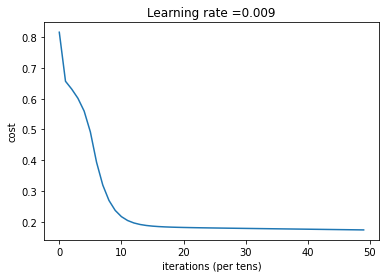

In [7]:
parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.009, num_iterations = 5000, print_cost = True)

In [8]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9272300469483565


In [9]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.944055944055944
